In [1]:
import compare_simulations as cs
import network_conversion as ntc

import polars as pl
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt, colors
import seaborn as sns

In [11]:
%matplotlib inline

In [ ]:
static_metrics = cs.recompute_metrics("zero_sims/static/sim_all.h5")

In [79]:
static_metrics.write_parquet("zero_sims/static/wself_metrics.parquet")

In [31]:
static_noselfloop_metrics = cs.recompute_metrics("zero_sims/static/noselfloop_sim_all.h5")

In [80]:
static_noselfloop_metrics.write_parquet("zero_sims/static/noself_metrics.parquet")

In [15]:
metrics_eh = pl.read_parquet("zero_sims/snapshot/metrics.parquet")

In [50]:
metrics_snapshot_noselfloop = cs.recompute_metrics("zero_sims/snapshot/sim_all_nodirectselfloop.h5")

In [81]:
metrics_snapshot_noselfloop.write_parquet("./zero_sims/snapshot/noself.metrics.parquet")

In [26]:
metrics_tn = pl.read_csv("zero_sims/temporal/met_df.csv").with_columns(pl.selectors.starts_with('hitting_time').cast(pl.Float64) * 0.2)

In [20]:
def pull_hitting_times(metrics, nulled=False):
    hitting_times = metrics.select(pl.selectors.starts_with('hitting_time')).to_numpy()
    if nulled:
        hitting_times = hitting_times[np.isfinite(hitting_times)]
    return hitting_times

In [64]:
np.max(pull_hitting_times(static_noselfloop_metrics, nulled=True))

2920.0

(0.0, 100000.0)

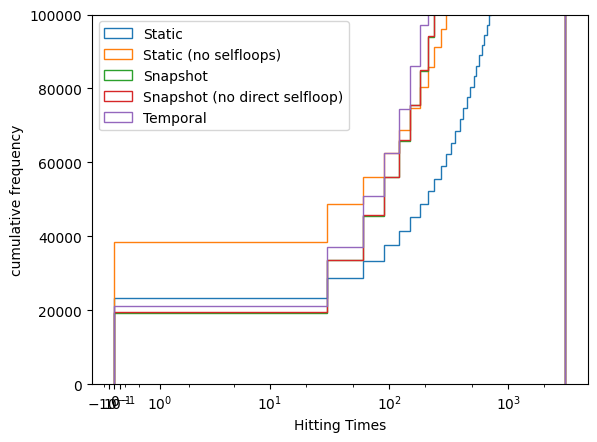

In [85]:
for metric, name in zip(
    (static_metrics, static_noselfloop_metrics, metrics_eh, metrics_snapshot_noselfloop, metrics_tn), 
    ('Static', 'Static (no selfloops)', 'Snapshot', 'Snapshot (no direct selfloop)', 'Temporal')
    # (metrics_eh, metrics_snapshot_noselfloop,), 
    # ('Snapshot', 'Snapshot (no direct selfloop)')
):
    ht = pull_hitting_times(metric, nulled=True)
    ht = ht[ht > 0.0]

    plt.hist(ht, bins=np.linspace(0, 3000, 101), histtype=u'step', label=name, cumulative=True)
plt.legend()
plt.xlabel('Hitting Times')
plt.ylabel('cumulative frequency')
plt.xscale('asinh')
plt.ylim(None, 100_000)
# plt.show()
# plt.savefig('./pres_setp2024/hitting_comp_asinh.png', dpi=200)

In [ ]:
#@should think about the mover sum? 